In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

In [2]:
def mol_with_atom_index(mol):
    atoms = mol.GetNumAtoms()
    tmp_mol = Chem.Mol(mol)
    for idx in range(atoms):
        tmp_mol.GetAtomWithIdx(idx).SetProp('molAtomMapNumber', str(tmp_mol.GetAtomWithIdx(idx).GetIdx()))
    return tmp_mol

In [4]:
%cd ~/deepfrag

In [4]:
#first the ligans i have don't have hydrogens, so first protonate
!obabel -isdf 6q4d_B_HHT.sdf -osdf -O Bh.sdf -h

In [23]:
def tosdf(x):
  '''Rdkit mol to SDF string.'''
  return Chem.MolToMolBlock(x)+'$$$$\n'

def to2d(x):
  '''Remove 3d coordinate info from a rdkit mol for display purposes.'''
  return Chem.MolFromSmiles(Chem.MolToSmiles(x, isomericSmiles=False))

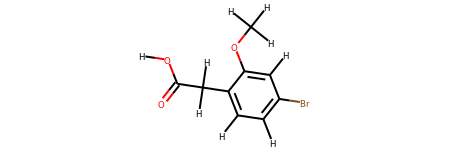

In [54]:
mol = Chem.MolFromMolFile('./6q4d_B_HHT.sdf') #non protonated ligand
mol = Chem.AddHs(mol) #adds all Hs at (0,0,0)
AllChem.Compute2DCoords(mol)
mol

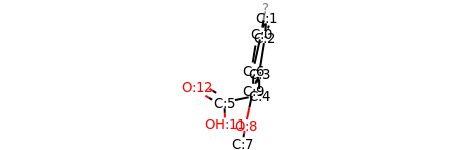

In [59]:
mol_with_atom_index(mol)

In [31]:
def atom_sub(rdkit_mol: Chem.Mol, target_idx: int, new_atom: int) -> Chem.Mol:
    edit_mol = Chem.RWMol(rdkit_mol)
    for atom in edit_mol.GetAtoms():
        if atom.GetIdx() == target_idx:
            atom.SetAtomicNum(new_atom)
    return Chem.Mol(edit_mol)

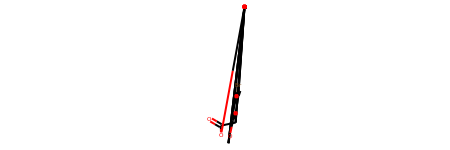

In [52]:
mol

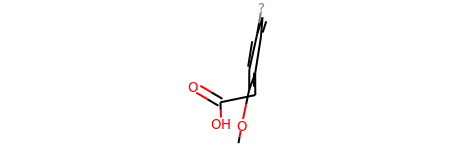

In [58]:
mol = Chem.MolFromMolFile('./Bh.sdf')
mol

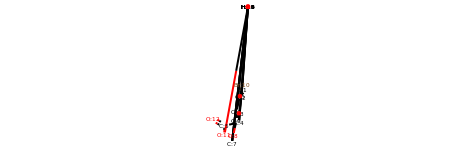

In [49]:
new = atom_sub(mol, 13, 1)
mol_with_atom_index(new) #didnt work in 3D

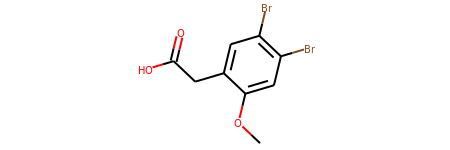

In [48]:
to2d(new) #successful replacement in 2D

In [55]:
with open('replace3.sdf', 'w') as f:
    f.write(tosdf(mol))